# Description of Data

The actual concrete compressive strength (MPa) for a given mixture under a  specific age (days) was determined from laboratory. Data is in raw form (not scaled).The data has 8 quantitative input variables, and 1 quantitative output variable, and 1030 instances (observations)

# Objective:  

Modeling of strength of high performance concrete using Machine Learning 

# 1. Deliverable -1  (Exploratory data quality report reflecting the following) 

# a. Univariate analysis 

i. Univariate analysis – data types and description of the independent attributes which should include (name, meaning, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of the body of distributions / tails,  missing values, outliers 

# Lets  Import the necessary libraries for EDA

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt

In [5]:
%matplotlib inline 

# Read the data as a Concrete

In [6]:
concrete=pd.read_csv('concrete.csv')

In [7]:
concrete.head() #lets see head of the datset

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [8]:
concrete.shape #lets see the shape of data

(1030, 9)

In [9]:
concrete.dtypes #lets see the data types of attributes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

As ypu can  see we dont have any categorical varibles and only numerical coloumns 

# Checking the presence of missing values

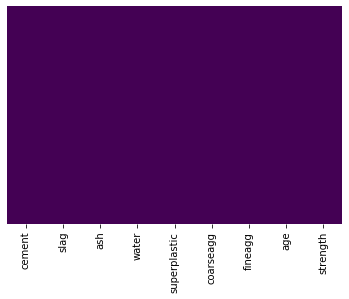

In [10]:
#visualiation of misssing value in heat map
sns.heatmap(concrete.isnull(),yticklabels=False,cbar=False,cmap='viridis')

as we can see above there is no missing values in dataset

In [11]:
concrete.info() #lets have a ook attributes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [12]:
concrete.isnull().sum() # we can see there is no missing value in dataset

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

# Description of the independent attributes

In [13]:
concrete.describe().transpose()  # using describe we can understand numerical data how spread is and skewsness also.

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


# From above descriptive stats we can analyse info as below

we will take median as central value 

median=50% and also q2


25%=q1

75%=q3
1. cement -its skewed towrads right side tale of Distribution from  median  (Right side outlier)
2. slag-we can clearly see q1 and min having 0, indicates distribution skewed to towards q3 and max
3. ash- we dont have median value it shows 0 and only we have mean value and also no distiribution on lefet side
4. water - bit skwed towards q1
5. super plastic -skwed towards q3 and no left side distribution
6. coarseagg-skewed towaards q3 and max
7. fineagg-skewed towaards q1 and min ,left side of tale.
8. age-skewed towaards q3 and max
9. strength-skewed towaards q3 and max

From above stats we can celaerly see data is skewed

# Lets visualize the outliers of attributes

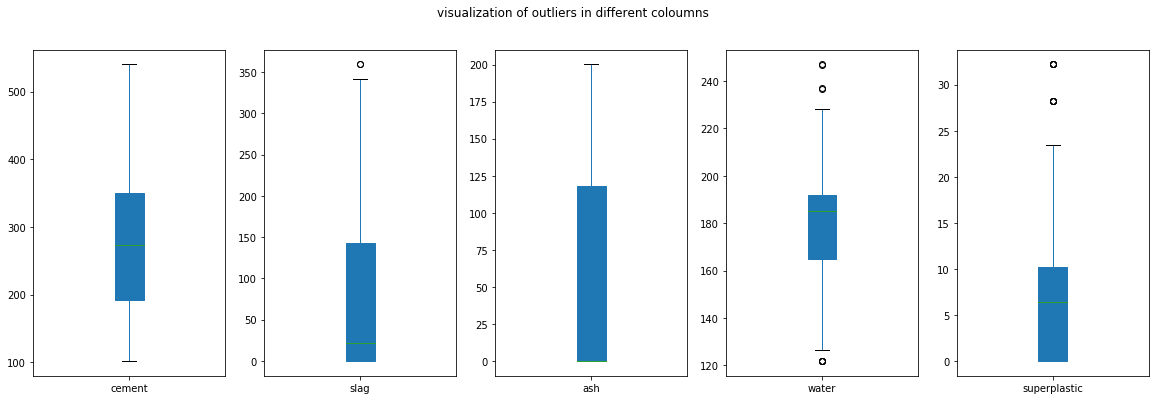

In [14]:
 concrete[['cement','slag','ash',
          'water','superplastic']].plot(kind = 'box', 
            figsize = (20,6),
            subplots = True, layout = (1,5),
            sharex = False, sharey = False,patch_artist=True,
            title='visualization of outliers in different coloumns')
plt.show()
#we can see outliers in radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio

From above visulas we can see  slag and water,superplastic having outliers and all of the attributes are skewed

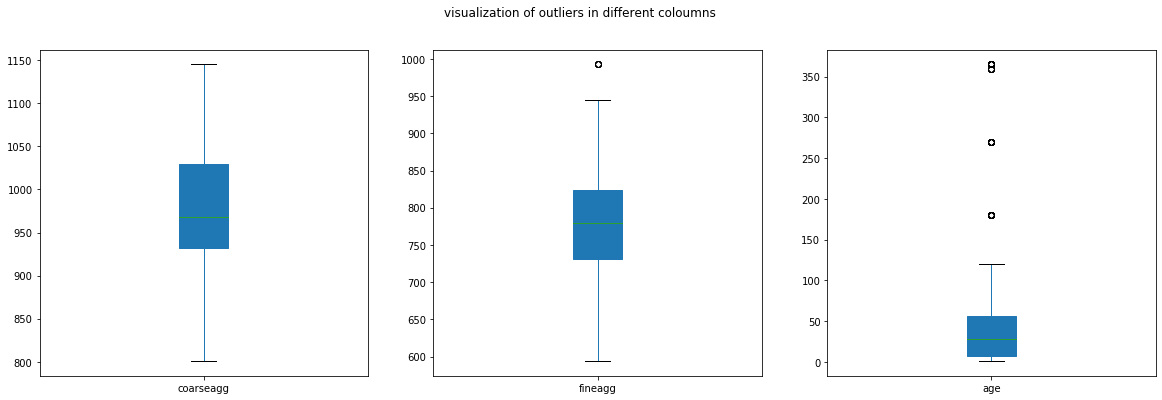

In [15]:
 concrete[['coarseagg','fineagg','age',
          ]].plot(kind = 'box', 
            figsize = (20,6),
            subplots = True, layout = (1,3),
            sharex = False, sharey = False,patch_artist=True,
            title='visualization of outliers in different coloumns')
plt.show()
#we can see outliers in radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio

from above visuals we can see fineagg and age is having out liers and all of attributes are skewed




# lets see the distirbution of each indpendendent attributes

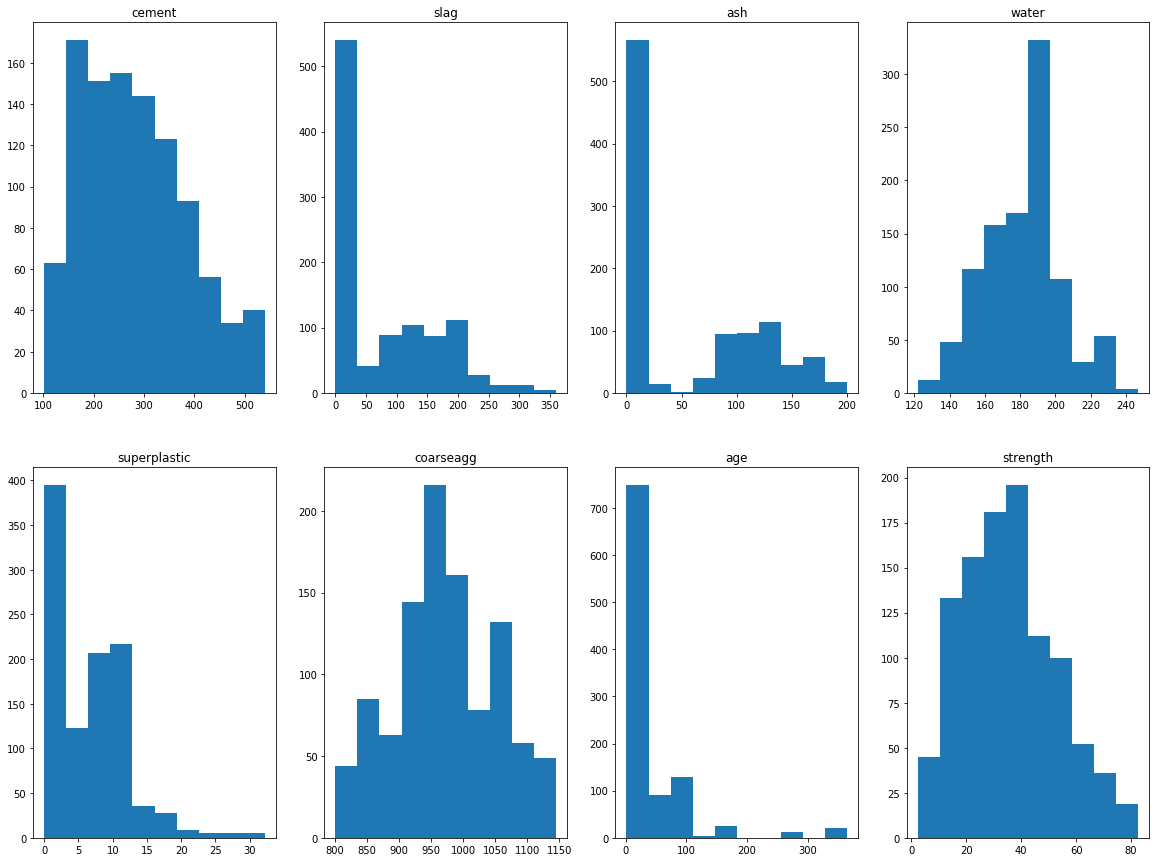

In [16]:
num_columns = ['cement', 'slag','ash', 'water', 'superplastic', 'coarseagg','age','strength']

fig, axs = plt.subplots(2, 4, sharex=False, sharey=False, figsize=(20, 15))

counter = 0
for num_column in num_columns:
    
    trace_x = counter // 4
    trace_y = counter % 4
    
    axs[trace_x, trace_y].hist(concrete[num_column])
    
    axs[trace_x, trace_y].set_title(num_column)
    
    counter += 1

plt.show()

we can clearly see data is not normally distributed in each and every attribute,courseagg is liitle bit looks normally distributed

# b. Multivariate analysis 

i. Bi-variate analysis between the predictor variables and between the predictor variables and target column. Comment on your findings in terms of their relationship and degree of relation if any. Presence of leverage points. Visualize the analysis using boxplots and pair plots, histograms or density curves. Select the most appropriate attributes 

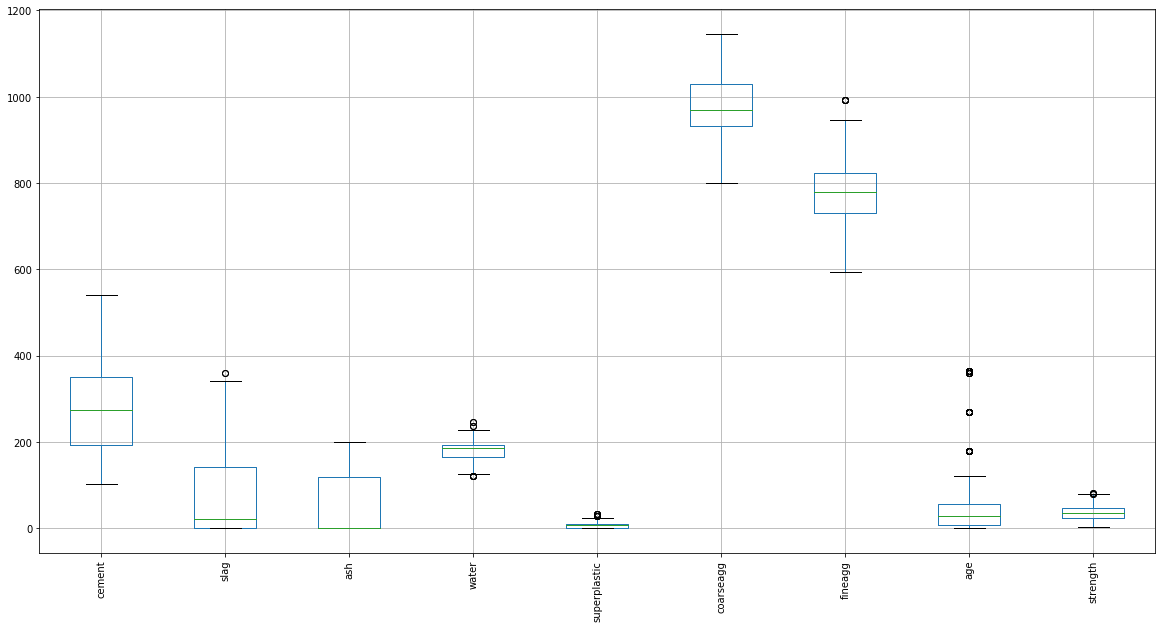

In [17]:
# Plot the central tendency of the dataset using box plots
_, bp = concrete.boxplot(return_type='both', figsize=(20,10), rot='vertical')

fliers = [flier.get_ydata() for flier in bp["fliers"]]
boxes = [box.get_ydata() for box in bp["boxes"]]
caps = [cap.get_ydata() for cap in bp['caps']]
whiskers = [whiskers.get_ydata() for whiskers in bp["whiskers"]]

# from above plot we can see the data is skwed towards q3 and max in most of the attributes

# Lets see how indpendent variables are intaracting with target attribute "strength"

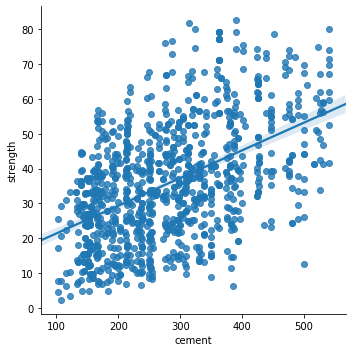

In [18]:
# cement vs target variable strength
sns.lmplot(x="cement",y="strength",data=concrete)


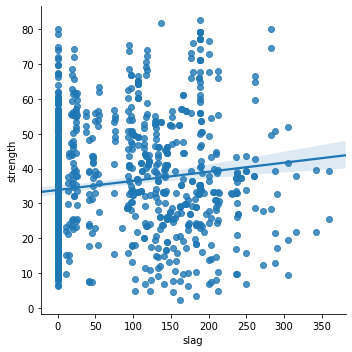

In [19]:
# slag vs target variable strength
sns.lmplot(x="slag",y="strength",data=concrete)

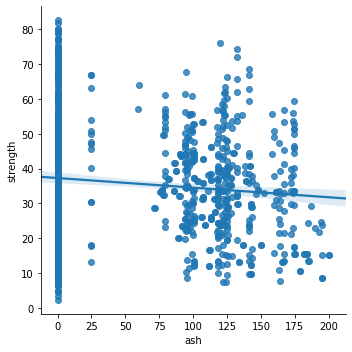

In [20]:
# ash vs target variable strength
sns.lmplot(x="ash",y="strength",data=concrete)

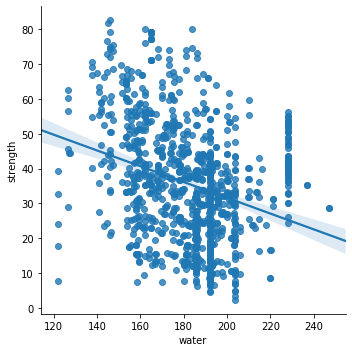

In [21]:
# water vs target variable strength
sns.lmplot(x="water",y="strength",data=concrete)

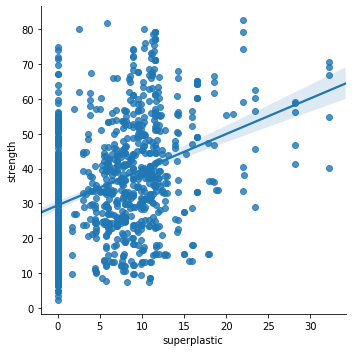

In [22]:
# superplastic vs target variable strength
sns.lmplot(x="superplastic",y="strength",data=concrete)

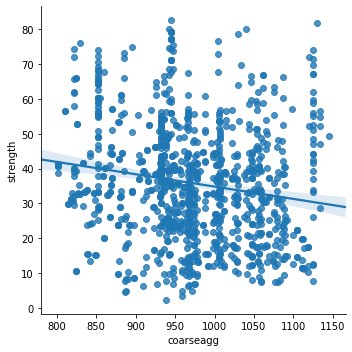

In [23]:
# coarseagg vs target variable strength
sns.lmplot(x="coarseagg",y="strength",data=concrete)

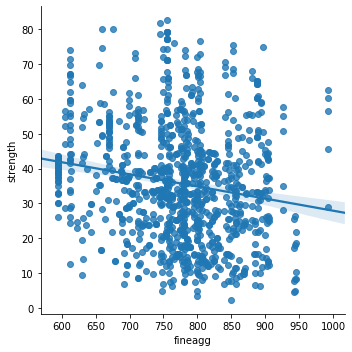

In [24]:
# fineagg vs target variable strength
sns.lmplot(x="fineagg",y="strength",data=concrete)

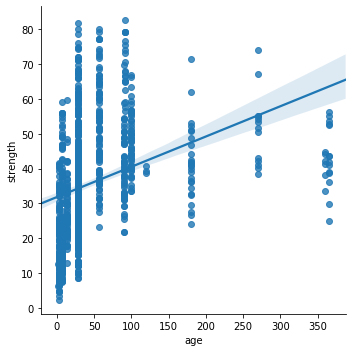

In [25]:
# age vs target variable strength
sns.lmplot(x="age",y="strength",data=concrete)

# we can see from above plots slag and hash are week predictors of target variable strength

# Lets see the relationship between indepndent variables using correlation heat map

Text(0.5, 1, 'Heatmap showing correlations between numerical data')

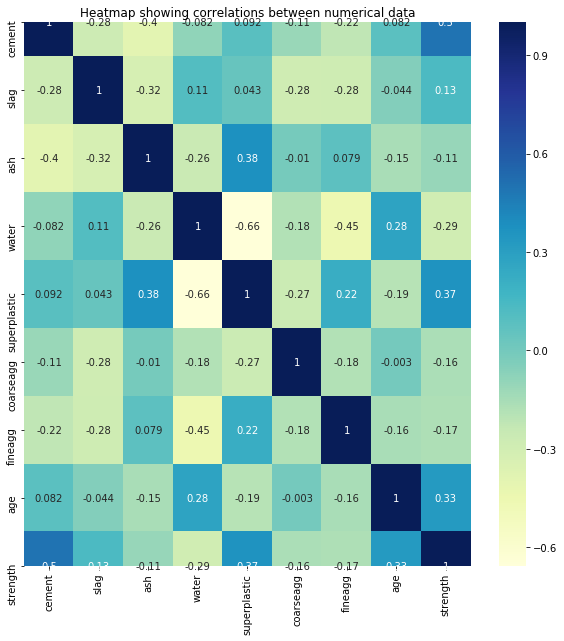

In [26]:
#checking the co relationship with all the varibles
plt.figure(figsize=(10,10))  
sns.heatmap(concrete.corr(),cmap='YlGnBu',annot=True)
#adult.corr()
plt.title('Heatmap showing correlations between numerical data')

we can see  water and superplastics are having possitve correlation ship of 60%(independendent varibles )
apart from that none of them have strong correlationshp between them and which is good 

Between cement  and target variable strength there is .50 relationhsip is there compare to any other atrributes ,by this we can understand cement is strong predicptr target variable(indepndent and target variable  )

ash and slag,coarseagg are having week relationship with target variable strength(less importance variabels)


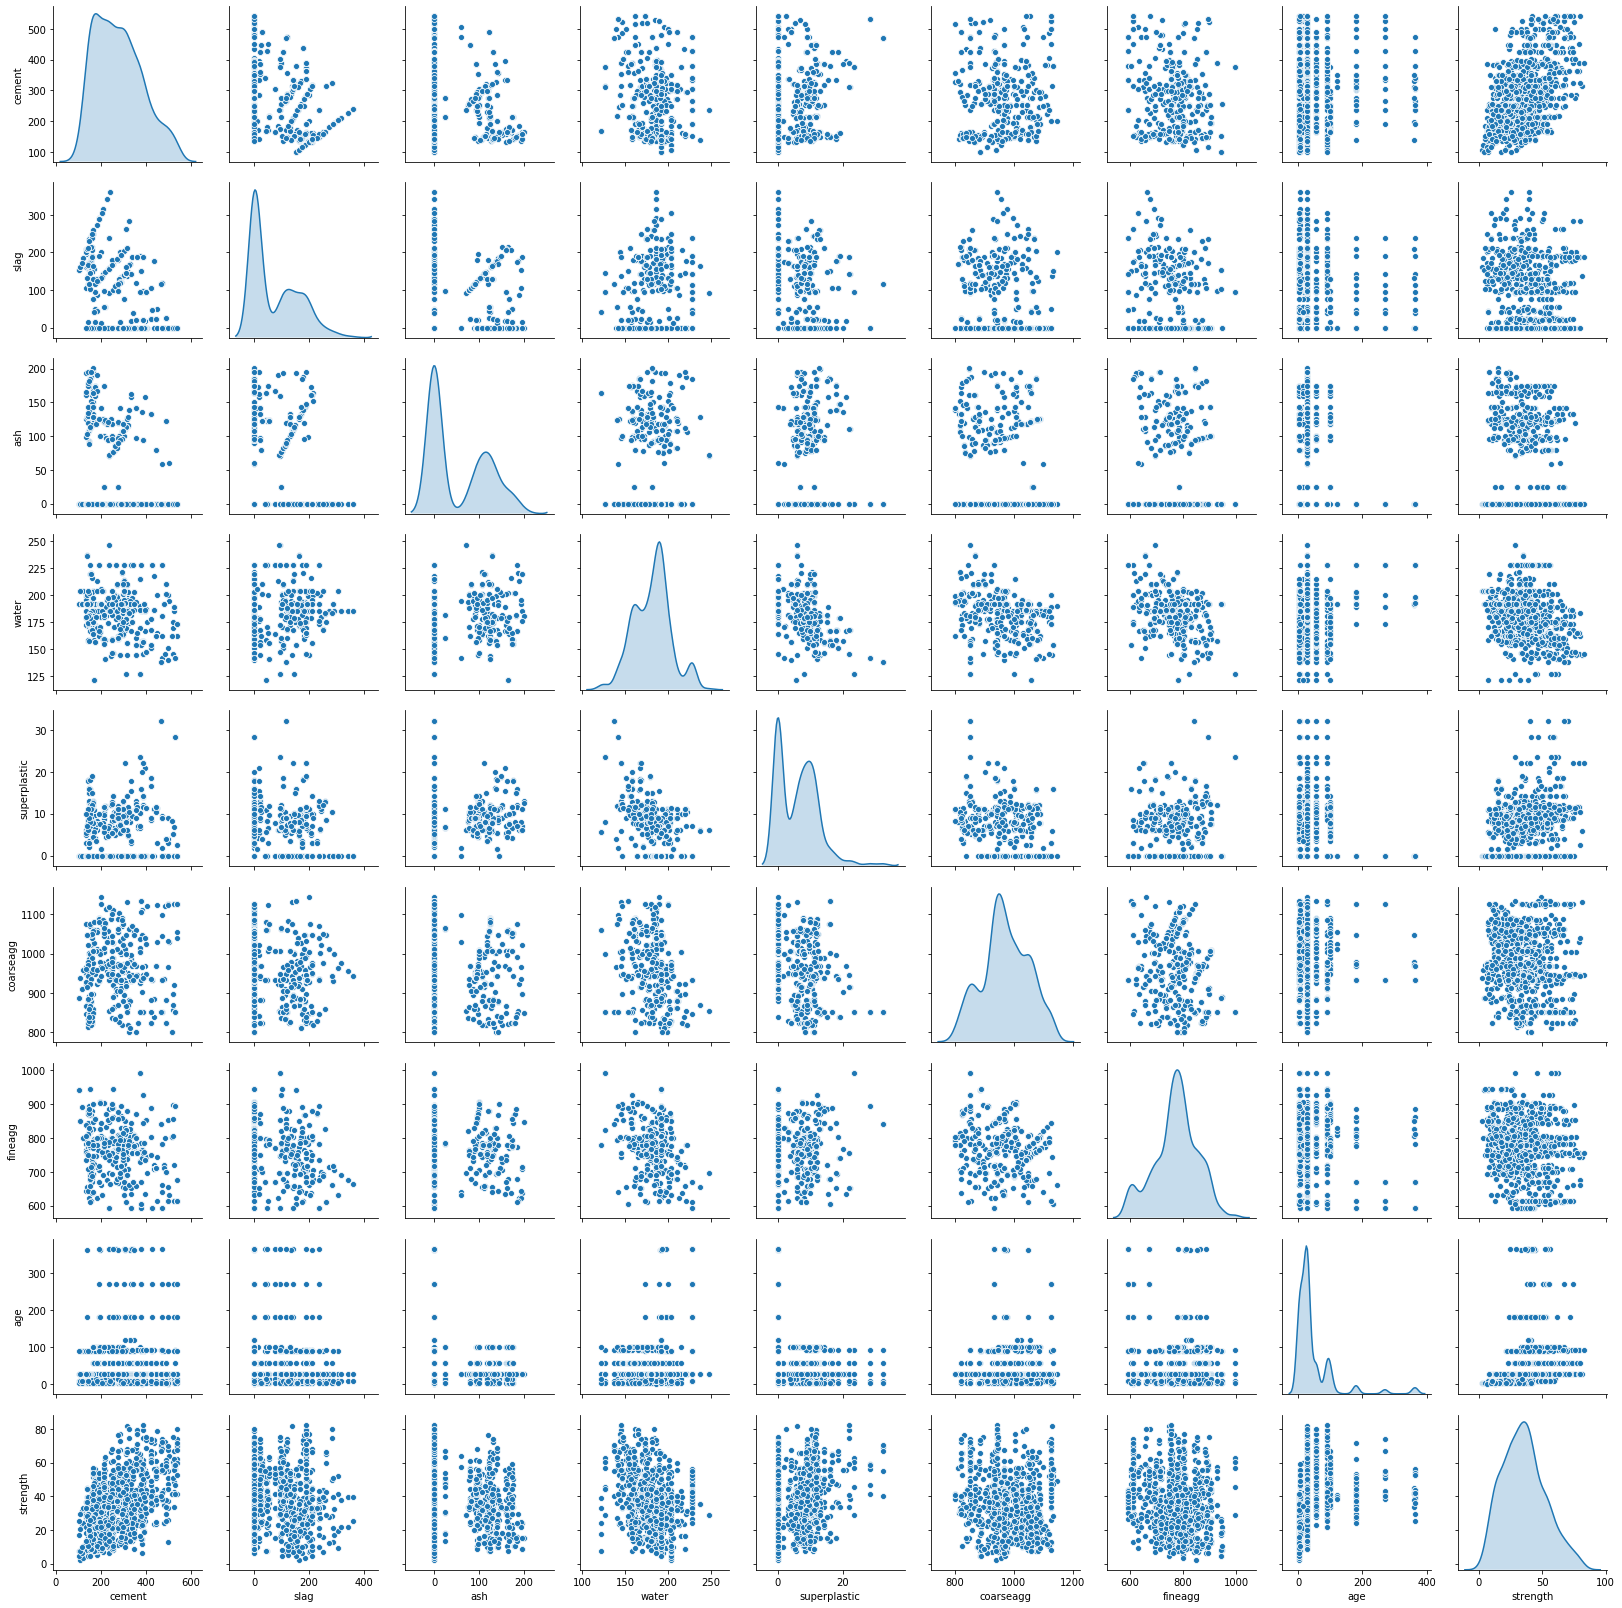

In [27]:
sns.pairplot(concrete,diag_kind='kde')  # showing paitplot for attributes  too see the multivariate  analsysis

# Observations:

1)From above pair plot we can understand that tehre is relationship between indepndepndent variable cement and target variable strength 

2) many of indepndent varibale are mixed up gaussians apart from cement attribute 

3)many of the attributes are skewed distribution towards right tale (q3 and max)

4) coarseagg and fineagg skewed distribution towards lefta tale(q1 and min)


In [28]:
#lets ee the correlation table
print("Correlation:") 
concrete.corr(method='pearson')

Correlation:


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplastic,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarseagg,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fineagg,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


'cement' has the highest correlation with the area of 'strength'(which is a positive correlation), followed by 'superplastic', which is also a positive correlation, 'ash' has the least correlation

# Conclusion:
    
    age superplastic water cement  attributes are better predictors of target variable strngth

# c. Strategies to address the different data challenges such as data pollution, outliers and missing values 

In [29]:
#lets see the out liers for each attribute
for idx, col in enumerate(concrete.columns[:-1]):
    print(col, '--', len(fliers[idx]))

cement -- 0
slag -- 2
ash -- 0
water -- 9
superplastic -- 10
coarseagg -- 0
fineagg -- 5
age -- 59


In [30]:
# Treat the outlier data points
for idx, col in enumerate(concrete.columns[:-1]):
    q1 = concrete[col].quantile(0.25)
    q3 = concrete[col].quantile(0.75)
    low = q1 - 1.5*(q3 - q1)
    high = q3 + 1.5*(q3 - q1)

    concrete.loc[(concrete[col] < low), col] = caps[idx * 2][0]
    concrete.loc[(concrete[col] > high), col] = caps[idx * 2 + 1][0]

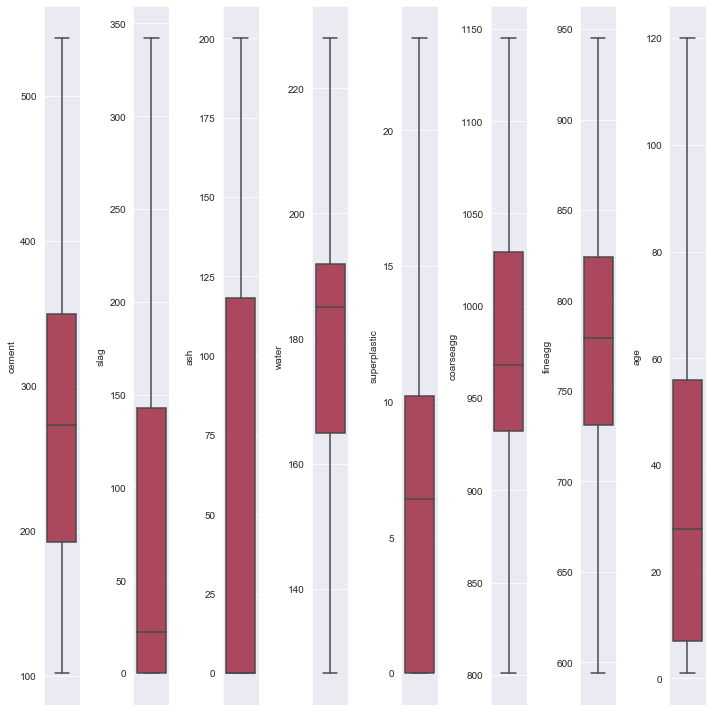

In [31]:
# Check the dataset after Outlier treatment
sns.set_style('darkgrid')
plt.figure(figsize=(10, 10))
index = 1
for col in concrete.columns[:-1]:
    plt.subplot(1, len(concrete.columns[:-1]), index)
    sns.boxplot(y=concrete[col], palette='inferno', fliersize=12)
    index += 1
plt.tight_layout()

# From above we can see handled outlers succesfully

(array([ 45., 133., 156., 181., 196., 112., 100.,  52.,  36.,  19.]),
 array([ 2.33 , 10.357, 18.384, 26.411, 34.438, 42.465, 50.492, 58.519,
        66.546, 74.573, 82.6  ]),
 <a list of 10 Patch objects>)

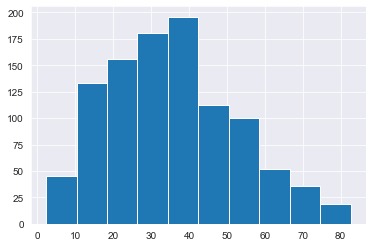

In [32]:
plt.hist((concrete.strength))#lets see out put varible strength distribution 

Most of the dataset's samples fall between 34 and 42 of 'strength' continous output class, with a positive skew

# 2. Deliverable -2  (Feature Engineering techniques) 

# a. Identify opportunities (if any) to create a composite feature, drop a feature 

# lets drop slag and ash  and wil split data and test  in  iteration 1 and will apply pca  in  and iteration 2(down the line)

In [33]:
#we will drop these features while progress through  in future , iam marking  down here,since thease fetaures are
#not a good predictors of out put

#X=concrete.drop(['slag','ash'], axis=1)

In [34]:
 x=concrete.drop(['strength'], axis=1)
y=concrete[['strength']]

# b. Decide on complexity of the model, should it be simple linear mode in terms of parameters or would a quadratic or higher degree help 

we can not  immidatly come out with which models to use in begining,as we progress through and by evaluating diffrent parameters ,
we will decide which models may perform better on reeal enivornment

we will try out different  models to come out with best performing models

 lets use  the following following models to find out better performing  models

Linear Regression

Ridge Regression

Lasso Regression

K Neighbors Regressor

Decision Tree Regressor

Random Forest Regressor

Gradient Boosting Regressor

Adaboost Regressor

# c. Explore for gaussians. If data is likely to be a mix of gaussians, explore individual clusters and present your findings in terms of the independent attributes and their suitability to predict strength

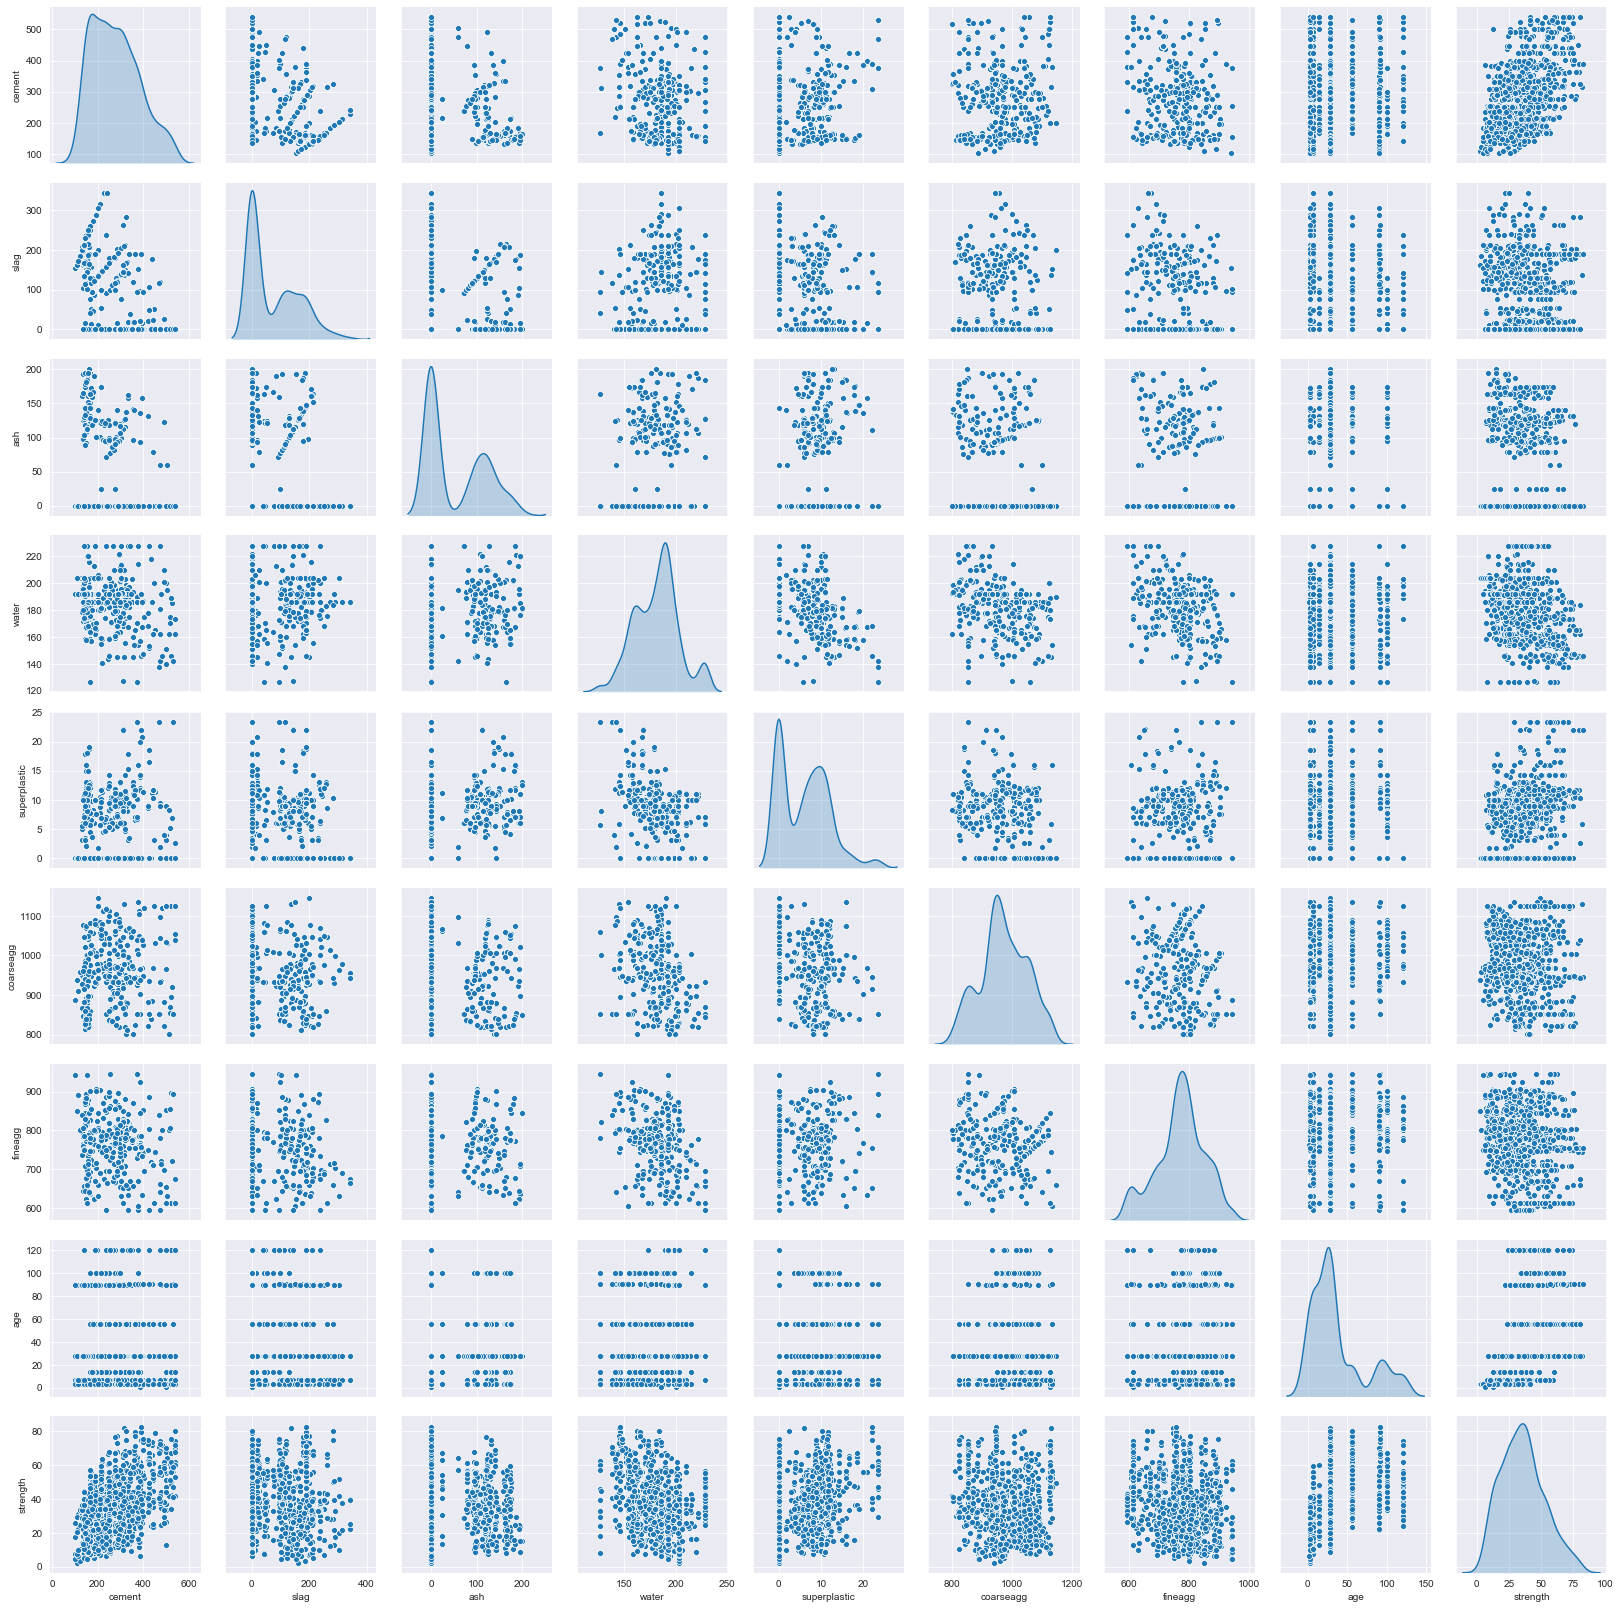

In [35]:
sns.pairplot(concrete,diag_kind='kde') 

# Conclsuion about guassians

1.As we can see cement attribute is normally distributed and we dont find any gaussians in that

2.many of the atributes are mixed up guassians 

3.only cement is having strong linear relationship with target strength coloumn

4.as we can se we are not finding any cluster relationship between indepndent and target variables and
 many of them are not having strong relation ship with target columns strength

5.cement,water,age,super plastics are reliable attributes to predict sterngth  

6.good thing is that none of that indepndent attributes are intarcting with each other stongly.



# 3. Deliverable -3  (create the model ) 

# a. Obtain feature importance for the individual features using multiple methods and present your findings

# a.1 # Lets see Feature importance using lasso model

In [36]:
from sklearn.linear_model import LassoCV 

In [37]:
reg = LassoCV()
reg.fit(x, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(x,y))
coef = pd.Series(reg.coef_, index = x.columns)

Best alpha using built-in LassoCV: 0.868299
Best score using built-in LassoCV: 0.737017


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [38]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 8 variables and eliminated the other 0 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

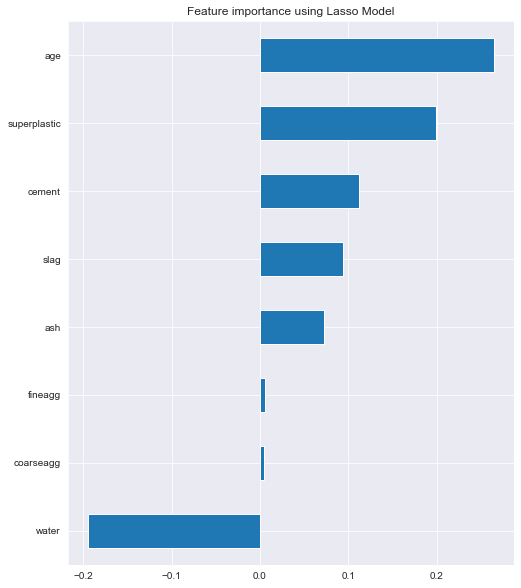

In [39]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

As we can see above that fineagg,coarsagg and hash  coloumns are having very near 0 coefficiants   and the week predictors of coloumns 'strength'.

# a.2# lets see fetaure importance using pearson correrlation filter method

In [40]:
#lets ee the correlation table
print("Correlation:") 
concrete.corr(method='pearson')

Correlation:


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.275406,-0.397467,-0.081720,0.073064,-0.109349,-0.226908,0.048754,0.497832
slag,-0.275406,1.000000,-0.323655,0.106711,0.045266,-0.284197,-0.284095,-0.051969,0.135077
ash,-0.397467,-0.323655,1.000000,-0.258938,0.402790,-0.009961,0.082130,-0.082941,-0.105755
water,-0.081720,0.106711,-0.258938,1.000000,-0.668044,-0.179034,-0.447623,0.176138,-0.292363
superplastic,0.073064,0.045266,0.402790,-0.668044,1.000000,-0.259049,0.212364,-0.112134,0.366113
coarseagg,-0.109349,-0.284197,-0.009961,-0.179034,-0.259049,1.000000,-0.175234,0.012947,-0.164935
fineagg,-0.226908,-0.284095,0.082130,-0.447623,0.212364,-0.175234,1.000000,-0.087178,-0.171038
age,0.048754,-0.051969,-0.082941,0.176138,-0.112134,0.012947,-0.087178,1.000000,0.480124
strength,0.497832,0.135077,-0.105755,-0.292363,0.366113,-0.164935,-0.171038,0.480124,1.000000


As we can see above that fineagg,coarsagg and hash,slag coloumns are having very week relationship with target coloumns 'strength'.

In [41]:
cor = concrete.corr()

In [42]:
#Correlation with output variable
cor_target = abs(cor["strength"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.30]
relevant_features

cement          0.497832
superplastic    0.366113
age             0.480124
strength        1.000000
Name: strength, dtype: float64

as we  see above age ,superplastic and cement are reliable freatures for strength

As we can see, only the features cement, superplastic  and age are highly correlated with the output variable MEDV. Hence we will drop all other features apart from these. However this is not the end of the process. One of the assumptions of linear regression is that the independent variables need to be uncorrelated with each other. If these variables are correlated with each other, then we need to keep only one of them and drop the rest. So let us check the correlation of selected features with each other. This can be done either by visually checking it from the above correlation matrix or from the code snippet below.

# relationship between indepndendent variables

In [43]:
print(concrete[["cement","superplastic"]].corr())
print(concrete[["age","cement"]].corr())

                cement  superplastic
cement        1.000000      0.073064
superplastic  0.073064      1.000000
             age    cement
age     1.000000  0.048754
cement  0.048754  1.000000


From above we can see very less relationship between variables and which is good

# Conclusion about Feature importance

as we seen above using different methods we came to know that 

cement,
superplastic,
age,
water,

are the better predictor of out variable strength

and

ash,
slag,
fineagg,
coarseagg.

are the week predictors of output variable strength

# ITERATION 1:  (lets build model by dropping less reliable attributes)

In [44]:
X=concrete.drop(['slag','ash'], axis=1)

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x,
                                                    y,
                                                    test_size = .2,
                                                    random_state = 1)

In [46]:
#Scaling the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train),
                              columns = X_train.columns)
X_train_scaled.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
0,1.038012,-0.838714,-0.883934,0.507083,-1.091066,-0.433488,-0.164499,-1.008759
1,0.753573,1.358669,-0.883934,-0.778247,0.934503,-0.372869,-0.192063,-0.285911
2,-0.654587,-0.838714,0.995414,-0.047838,-0.095743,1.083283,0.102373,-0.285911
3,1.954953,-0.536428,1.017051,0.933946,-0.410056,-1.955419,-0.903720,-1.008759
4,1.805248,0.542498,-0.883934,-0.009895,0.463034,-1.567198,0.129937,-1.008759


In [47]:
#scaling test data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_test)
X_test_scaled = pd.DataFrame(scaler.transform(X_train),
                              columns = X_test.columns)
X_test_scaled.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
0,1.226840,-0.936219,-0.709580,0.447325,-0.991898,-0.384722,-0.310773,-0.981725
1,0.903657,1.254910,-0.709580,-0.821854,1.026702,-0.324760,-0.338990,-0.239740
2,-0.696311,-0.936219,1.336641,-0.100623,0.000000,1.115595,-0.037581,-0.239740
3,2.268679,-0.634794,1.360199,0.868824,-0.313231,-1.890142,-1.067501,-0.981725
4,2.098583,0.441062,-0.709580,-0.063157,0.556855,-1.506132,-0.009364,-0.981725


In [48]:
#We will save the model performance metrics in a DataFrame
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold, cross_val_score
import numpy as np
Model = []
RMSE = []
R_sq = []
cv = KFold(5, random_state = 1)

#Creating a Function to append the cross validation scores of the algorithms
def input_scores(name, model, x, y):
    Model.append(name)
    RMSE.append(np.sqrt((-1) * cross_val_score(model, x, y, cv=cv, 
                                               scoring='neg_mean_squared_error').mean()))
    R_sq.append(cross_val_score(model, x, y, cv=cv, scoring='r2').mean())

In [49]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor, 
                              AdaBoostRegressor)

names = ['Linear Regression', 'Ridge Regression', 'Lasso Regression',
         'K Neighbors Regressor', 'Decision Tree Regressor', 
         'Random Forest Regressor', 'Gradient Boosting Regressor',
         'Adaboost Regressor']
models = [LinearRegression(), Ridge(), Lasso(),
          KNeighborsRegressor(), DecisionTreeRegressor(),
          RandomForestRegressor(), GradientBoostingRegressor(), 
          AdaBoostRegressor()]

#Running all algorithms
for name, model in zip(names, models):
    input_scores(name, model, X_train_scaled, Y_train.values.ravel())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

In [50]:
evaluation = pd.DataFrame({'Model': Model,
                           'RMSE': RMSE,
                           'R Squared': R_sq})
print("FOLLOWING ARE THE TRAINING SCORES: ")
evaluation

FOLLOWING ARE THE TRAINING SCORES: 


,Model,RMSE,R Squared
0,Linear Regression,8.614265,0.729201
1,Ridge Regression,8.615139,0.729143
2,Lasso Regression,9.278472,0.686176
3,K Neighbors Regressor,8.415522,0.741440
4,Decision Tree Regressor,7.078531,0.827749
5,Random Forest Regressor,5.557637,0.884702
6,Gradient Boosting Regressor,5.330266,0.896797
7,Adaboost Regressor,7.689591,0.775830


These score on raw data and with out dropping any cloumns ,down the line we  will use data which we  have dropped coloumns and scaled one

Gradient Boosting Regressor has the lowest RMSE, highest R-Squared

# 4. Deliverable -4 (Tuning the model) 

# a. Algorithms that you think will be suitable for this project 

GradientBoostingRegressor and RandomForestRegressor are looking best for this dataset and we will build model for them

In [51]:
#tuning this base model(will build model for this)
GradientBoostingRegressor()

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [52]:
#lets build model for random forest regressor too(will tune for better perofrmnace)
RandomForestRegressor()

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

# b. Techniques employed to squeeze that extra performance out of the model without making it overfit or underfit

# 1 ) For gradient boost regressor lets tune model  using grid sercahcv and kfold validation and will build model to get extra performance

In [53]:
 #mark  down this CELL  since it takes more time,after this we will find out specific parameters

from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators':range(20,1001,10),
             'max_depth':[10], #range(5,16,2), 
             'min_samples_split':[100], #range(200,1001,200), 
              'learning_rate':[0.2]}
clf = GridSearchCV(GradientBoostingRegressor(random_state=1), 
                   param_grid = param_grid, scoring='r2', 
                   cv=cv).fit(X_train_scaled, Y_train.values.ravel())
print(clf.best_estimator_) 
print("R Squared:",clf.best_score_)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.2, loss='ls', max_depth=10, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=100, min_weight_fraction_leaf=0.0,
             n_estimators=270, n_iter_no_change=None, presort='auto',
             random_state=1, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)
R Squared: 0.9281855361971827


In [54]:
#marck down this  since it takes more time to execute
#tuning the tree specific parameters
param_grid = {'n_estimators': [230],
             'max_depth': range(10,31,2), 
              'min_samples_split': range(50,501,10), 
              'learning_rate':[0.2]}
clf = GridSearchCV(GradientBoostingRegressor(random_state=1), 
                  param_grid = param_grid, scoring='r2', 
                   cv=cv).fit(X_train_scaled,Y_train.values.ravel())
print(clf.best_estimator_) 
print("R Squared:",clf.best_score_)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.2, loss='ls', max_depth=20, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=200, min_weight_fraction_leaf=0.0,
             n_estimators=230, n_iter_no_change=None, presort='auto',
             random_state=1, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)
R Squared: 0.9335675063432372


# These scores on training dataset ,will se results on testing data down the line

In [55]:
#Let apply params to fit this model and see training scores
clfg = GradientBoostingRegressor(random_state=1, max_depth=20, 
                                min_samples_split=200, n_estimators=230, 
                                learning_rate=0.2)
print("R Squared:",cross_val_score(clfg, X_train_scaled, Y_train.values.ravel(), cv=cv, scoring='r2').mean())

R Squared: 0.9335603875417139


Since score improved, the best model is GradientBoostingRegressor with learning_rate= 0.2, max_depth= 20, min_samples_split= 200, n_estimators= 230

In [56]:
#applying this model on test data and see scores
x_test_scaled = pd.DataFrame(scaler.transform(X_test),
                             columns = X_test.columns)
clfg = GradientBoostingRegressor(learning_rate=0.2, max_depth=20,
                                min_samples_split=200, n_estimators=230, 
                                random_state=1).fit(X_train_scaled, Y_train.values.ravel())


In [57]:
print("Test RMSE: ", np.sqrt(mean_squared_error(Y_test, clfg.predict(x_test_scaled))))
print("Test R^2: ", r2_score(Y_test, clfg.predict(x_test_scaled)))


Test RMSE:  5.902825536979121
Test R^2:  0.8816740525394589


# As we can see when test against test data accuracy is dropped by 6 percent and rmse remains similer almost

# 2 )Building model for  Random forest regressor(using kfold and gridsearch cv to get extra performance out of model)

In [58]:
#  mark down this cell  since it takes more time(20min),after this we will find out specific parameters
#tuning for number of trees
param_grid={
     'bootstrap':[False],
     'max_depth':[80,90,100,110],
     'max_features':[2,3,4,5],
     'min_samples_leaf':[3,4,5],
     'n_estimators':[100,200,300,1000]
}


clf = GridSearchCV(RandomForestRegressor(random_state=1), 
                   param_grid = param_grid, scoring='r2', 
                   cv=cv).fit(X_train_scaled, Y_train.values.ravel())
print(clf.best_estimator_) 
print("R Squared:",clf.best_score_)
print("BEST PARAMS:",clf.best_params_)

RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=80,
           max_features=4, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=3,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=1000, n_jobs=None, oob_score=False, random_state=1,
           verbose=0, warm_start=False)
R Squared: 0.8985102769762192
BEST PARAMS: {'bootstrap': False, 'max_depth': 80, 'max_features': 4, 'min_samples_leaf': 3, 'n_estimators': 1000}


This score on training data and will result on testing data down the line

In [59]:
#Let apply params to fit this model and see the trsinings scores

x_test_scaled = pd.DataFrame(scaler.transform(X_test),
                             columns = X_test.columns)

clfr = RandomForestRegressor(random_state=1, bootstrap=False, 
                                max_depth=80, max_features=4, 
                                min_samples_leaf=3,n_estimators=1000).fit(X_train_scaled, Y_train.values.ravel())
print("R Squared:",cross_val_score(clfr, X_train_scaled, Y_train.values.ravel(), cv=cv, scoring='r2').mean())

R Squared: 0.8985275561586661


This score on training data and will result on testing data down the line

In [60]:
test_score = clfr.score(x_test_scaled, Y_test)
test_score

0.881375362131782

In [61]:
#lets see results on testing data
print("Test RMSE: ", np.sqrt(mean_squared_error(Y_test, clfr.predict(x_test_scaled))))
print("Test R^2: ", r2_score(Y_test, clfr.predict(x_test_scaled)))


Test RMSE:  5.910271097931423
Test R^2:  0.881375362131782


# As we can see RandomForestRegressor Performing Equally well on training set and also in testing set













# ITERATION 2: LETS BUILD MODEL BY APPLYING PCA(PRINCIPLE COMPONENT ANALYSIS)


# 1)Will build model for Gradientboostregressor  By applying PCA

In [62]:
from sklearn.decomposition import PCA

In [63]:
from scipy.stats import zscore

In [64]:
XScaled=concrete.apply(zscore)
XScaled.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,-1.339017,1.603837,-0.847144,1.038806,-1.070393,-0.014398,-0.312289,-0.276792,-0.355018
1,-1.074790,-0.367612,1.096078,-1.099025,0.812800,1.388141,0.287169,-0.683574,-0.737108
2,-0.298384,-0.857572,0.648965,0.277322,-0.111360,-0.206121,1.104041,-0.276792,-0.395144
3,-0.145209,0.466016,-0.847144,2.197586,-1.070393,-0.526517,-1.298819,-0.276792,0.600806
4,-1.209776,1.271779,-0.847144,0.556375,0.516371,0.958372,-0.963273,-0.276792,-1.049727


In [65]:
#covarience matrix of scaled data
covMatrix = np.cov(XScaled,rowvar=False)
print(covMatrix)

[[ 1.00097182 -0.27567318 -0.39785361 -0.08179919  0.07313521 -0.10945526
  -0.22712896  0.04880104  0.49831572]
 [-0.27567318  1.00097182 -0.32396947  0.10681438  0.04530973 -0.28447347
  -0.28437099 -0.05201993  0.1352086 ]
 [-0.39785361 -0.32396947  1.00097182 -0.25918954  0.40318139 -0.00997051
   0.08221025 -0.08302168 -0.10585769]
 [-0.08179919  0.10681438 -0.25918954  1.00097182 -0.6686933  -0.17920813
  -0.44805761  0.17630894 -0.29264722]
 [ 0.07313521  0.04530973  0.40318139 -0.6686933   1.00097182 -0.25930063
   0.21257046 -0.11224322  0.36646908]
 [-0.10945526 -0.28447347 -0.00997051 -0.17920813 -0.25930063  1.00097182
  -0.17540462  0.01295939 -0.1650949 ]
 [-0.22712896 -0.28437099  0.08221025 -0.44805761  0.21257046 -0.17540462
   1.00097182 -0.08726267 -0.17120444]
 [ 0.04880104 -0.05201993 -0.08302168  0.17630894 -0.11224322  0.01295939
  -0.08726267  1.00097182  0.48059045]
 [ 0.49831572  0.1352086  -0.10585769 -0.29264722  0.36646908 -0.1650949
  -0.17120444  0.480590

In [66]:
#lets intialize and fit pca
pca = PCA(n_components=8)
pca.fit(XScaled)

PCA(copy=True, iterated_power='auto', n_components=8, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [67]:
print(pca.explained_variance_) #explained variance of each attributes

[2.23529579 1.97542334 1.41254857 1.11371818 1.00990175 0.89187551
 0.22473909 0.11657829]


The eigen Vectors

In [68]:
print(pca.components_) #principle components

[[-0.00997928 -0.16968389  0.37215871 -0.57651439  0.5650131  -0.0734493
   0.36812764 -0.11498462  0.16389883]
 [ 0.50869203  0.14199762 -0.2800645  -0.06425002  0.17568636 -0.19367489
  -0.22312359  0.34084316  0.63574448]
 [ 0.32620078 -0.69426332  0.02227566 -0.09745065 -0.21732341  0.56415611
   0.00629542  0.18789835  0.02741641]
 [ 0.45764763 -0.0421387  -0.51310316 -0.1355603  -0.0465547  -0.12195551
   0.24034872 -0.62611157 -0.20076811]
 [ 0.00355123  0.31463411  0.07053078 -0.24938599  0.16656011  0.53664684
  -0.60579123 -0.38615803  0.04462803]
 [ 0.31434199 -0.33744862  0.47979     0.34783018  0.12767117 -0.40531322
  -0.41352976 -0.27827146 -0.08433658]
 [-0.04168608  0.08623146  0.32998792 -0.18070374 -0.68121957 -0.09772404
   0.12198421 -0.31504896  0.51140439]
 [ 0.30487418  0.20425736  0.17498006 -0.54286237 -0.29749223 -0.22684622
  -0.18428027  0.33941484 -0.50088982]]


In [69]:
print(pca.explained_variance_ratio_) #explained variance of each attribute in percentage

[0.24812507 0.21927838 0.15679746 0.12362632 0.11210236 0.09900107
 0.02494677 0.01294057]


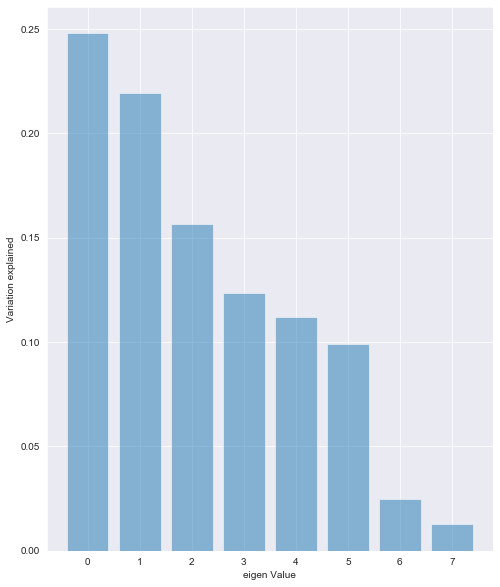

In [70]:
#lets visualize the contribution of variance of each attribute
plt.bar(list(range(8)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

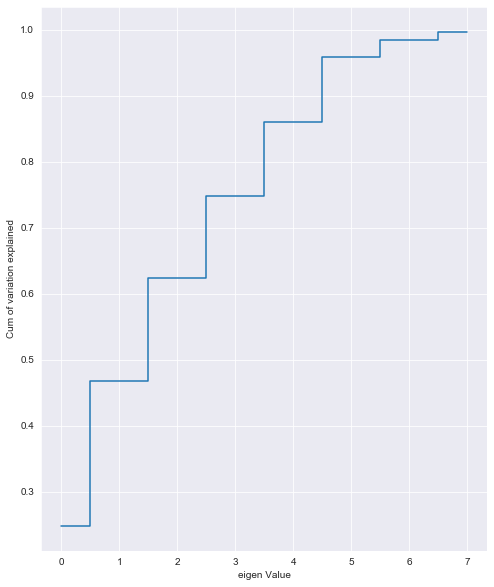

In [71]:
#we can see 5 attributes explaines 95% of variance overall.
plt.step(list(range(8)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

Now 6 dimensions seems very reasonable. With 6 variables we can explain over 95% of the variation in the original data!

In [72]:
#lets fit pca with 5 attributes
pca3 = PCA(n_components=6)
pca3.fit(XScaled)
print(pca3.components_)
print(pca3.explained_variance_ratio_)
Xpca3 = pca3.transform(XScaled)

[[-0.00997928 -0.16968389  0.37215871 -0.57651439  0.5650131  -0.0734493
   0.36812764 -0.11498462  0.16389883]
 [ 0.50869203  0.14199762 -0.2800645  -0.06425002  0.17568636 -0.19367489
  -0.22312359  0.34084316  0.63574448]
 [ 0.32620078 -0.69426332  0.02227566 -0.09745065 -0.21732341  0.56415611
   0.00629542  0.18789835  0.02741641]
 [ 0.45764763 -0.0421387  -0.51310316 -0.1355603  -0.0465547  -0.12195551
   0.24034872 -0.62611157 -0.20076811]
 [ 0.00355123  0.31463411  0.07053078 -0.24938599  0.16656011  0.53664684
  -0.60579123 -0.38615803  0.04462803]
 [ 0.31434199 -0.33744862  0.47979     0.34783018  0.12767117 -0.40531322
  -0.41352976 -0.27827146 -0.08433658]]
[0.24812507 0.21927838 0.15679746 0.12362632 0.11210236 0.09900107]


In [73]:
x_train, x_test, y_train, y_test = train_test_split(Xpca3, y, test_size=0.30, random_state=1)

In [74]:
# you  can  mark down this cell  since it takes more time(20min) ,after this we will find out specific parameters
#tuning for number of trees
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators':range(20,1001,10),
              'max_depth':[10], #range(5,16,2), 
              'min_samples_split':[100], #range(200,1001,200), 
              'learning_rate':[0.2]}
clf = GridSearchCV(GradientBoostingRegressor(random_state=1), 
                   param_grid = param_grid, scoring='r2', 
                   cv=cv).fit(x_train, y_train.values.ravel())
print(clf.best_estimator_) 
print("R Squared:",clf.best_score_)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.2, loss='ls', max_depth=10, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=100, min_weight_fraction_leaf=0.0,
             n_estimators=410, n_iter_no_change=None, presort='auto',
             random_state=1, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)
R Squared: 0.9457080081530351


In [75]:
#tuning the tree specific parameters
# you  can  mark down this cell  since it takes more time(20min) ,after this we will find out specific parameters
#tuning for number of trees
param_grid = {'n_estimators': [230],
              'max_depth': range(10,31,2), 
              'min_samples_split': range(50,501,10), 
              'learning_rate':[0.2]}
clf = GridSearchCV(GradientBoostingRegressor(random_state=1), 
                   param_grid = param_grid, scoring='r2', 
                   cv=cv).fit(x_train,y_train.values.ravel())
print(clf.best_estimator_) 
print("R Squared:",clf.best_score_)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.2, loss='ls', max_depth=20, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=50, min_weight_fraction_leaf=0.0,
             n_estimators=230, n_iter_no_change=None, presort='auto',
             random_state=1, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)
R Squared: 0.9498068570958732


These are all  training scores ,will test it on test data down the line

In [76]:
#Let apply params to fit this model
clfgp = GradientBoostingRegressor(random_state=1, max_depth=20, 
                                min_samples_split=50, n_estimators=230, 
                                learning_rate=0.2).fit(x_train,y_train.values.ravel())
print("R Squared:",cross_val_score(clfgp, x_train, y_train.values.ravel(), cv=cv, scoring='r2').mean())

R Squared: 0.9497954689134593


In [77]:
print("Test RMSE: ", np.sqrt(mean_squared_error(y_test, clfgp.predict(x_test))))
print("Test R^2: ", r2_score(y_test, clfgp.predict(x_test)))


Test RMSE:  3.651232482565018
Test R^2:  0.9541935168975157


# we can see with pca data performance is not drpped in testing set

# 2)will Buld model for random forest regressor by applying pca 

In [78]:
# you can  just mark down this  cell since it takes more time,after this we will find out specific parameters
#tuning for number of trees
param_grid={
     'bootstrap':[False],
     'max_depth':[80,90,100,110],
     'max_features':[2,3,4,5],
     'min_samples_leaf':[3,4,5],
     'n_estimators':[100,200,300,1000]
}


clf = GridSearchCV(RandomForestRegressor(random_state=1), 
                   param_grid = param_grid, scoring='r2', 
                   cv=cv).fit(x_train, y_train.values.ravel())
print(clf.best_estimator_) 
print("R Squared:",clf.best_score_)
print("BEST PARAMS:",clf.best_params_)


RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=80,
           max_features=3, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=3,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=1000, n_jobs=None, oob_score=False, random_state=1,
           verbose=0, warm_start=False)
R Squared: 0.9361381957715218
BEST PARAMS: {'bootstrap': False, 'max_depth': 80, 'max_features': 3, 'min_samples_leaf': 3, 'n_estimators': 1000}


Above is only traning scores ,we will test next on test data

In [79]:
clfrp = RandomForestRegressor(random_state=1, bootstrap=False, 
                                max_depth=80, max_features=3, 
                                min_samples_leaf=3,n_estimators=1000).fit(x_train, y_train.values.ravel())
print("R Squared:",cross_val_score(clfrp, x_train, y_train.values.ravel(), cv=cv, scoring='r2').mean())

R Squared: 0.9361274006177366


In [80]:
print("Test RMSE: ", np.sqrt(mean_squared_error(y_test, clfrp.predict(x_test))))
print("Test R^2: ", r2_score(y_test, clfrp.predict(x_test)))

Test RMSE:  3.9848532645555665
Test R^2:  0.9454402157758167


In [81]:
test_score = clfrp.score(x_test, y_test)
test_score

0.9454402157758168

# As we can see both the models gradientboosregressor and randomforst regressor are peroforming equally well on trining set and test set

# RMSE for both models is reduced when we apply PCA compared to only dropping 2 cloumns data which we did earlier

# c. Model performance range at 95% confidence level

# 1) For  RandomForestRegressor  Model(USING BOOTSTRAP SAMPLE METHOD)

In [82]:
from matplotlib import pyplot

In [83]:
len(concrete)

1030

In [84]:
from sklearn.utils import resample

In [85]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(concrete)
concr_scaled = pd.DataFrame(scaler.transform(concrete),
                              columns = concrete.columns)
concr_scaled .head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,-1.339017,1.603837,-0.847144,1.038806,-1.070393,-0.014398,-0.312289,-0.276792,-0.355018
1,-1.074790,-0.367612,1.096078,-1.099025,0.812800,1.388141,0.287169,-0.683574,-0.737108
2,-0.298384,-0.857572,0.648965,0.277322,-0.111360,-0.206121,1.104041,-0.276792,-0.395144
3,-0.145209,0.466016,-0.847144,2.197586,-1.070393,-0.526517,-1.298819,-0.276792,0.600806
4,-1.209776,1.271779,-0.847144,0.556375,0.516371,0.958372,-0.963273,-0.276792,-1.049727


In [86]:
values = concr_scaled.values

In [87]:
# configure bootstrap
n_iterations = 1000              # Number of bootstrap samples to create
n_size = int(len(concr_scaled) * 0.50)    # picking only 50 % of the given data in every bootstrap sample

# run bootstrap
stats = list()
for i in range(n_iterations):
    # prepare train and test sets
    train = resample(values, n_samples=n_size)  # Sampling with replacement 
    test = np.array([x for x in values if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample
    # fit model
    model = RandomForestRegressor(random_state=1, bootstrap=False, 
                                max_depth=80, max_features=3, 
                                min_samples_leaf=3,n_estimators=1000)
    
    model.fit(train[:,:-1], train[:,-1])
    
    # evaluate model
    predictions = model.predict(test[:,:-1])
    score = r2_score(test[:,-1], predictions)    # caution, overall accuracy score can mislead when classes are imbalanced
    print(score)
    stats.append(score)

0.8686233444718021
0.8346962622967568
0.87218271147724
0.859598781717004
0.8454429676898039
0.8486158225793868
0.8494819195610175
0.876630449021524
0.8730252037289765
0.8574536807022637
0.8379582322037376
0.837229419860542
0.8553755236414731
0.8699576083235837
0.844073548937858
0.8405974156969915
0.8703003039788435
0.8413585208061083
0.8507563684384568
0.8708829362451267
0.8178357171085818
0.8576551140390613
0.852224066097661
0.8381695817914343
0.8579090865050114
0.838425845243761
0.8229251022764884
0.8593105815532107
0.8597251748891499
0.8610387979653276
0.8524704958797739
0.866992522965554
0.8371930371411711
0.8542104962679453
0.8539073579557788
0.85691345591013
0.8693055819783254
0.8697238026088218
0.8587832825875112
0.8607728774189921
0.8465400814578109
0.7931803606051178
0.8587172340267242
0.8610378820161282
0.8386027199657404
0.8541154454225423
0.8500905936047396
0.8727561510902743
0.8441988573028267
0.8533547902622134
0.8327823092893311
0.8768862348137512
0.8390629224220891
0.87

0.8398375967503621
0.8613822722151492
0.8713742670602245
0.8583952453666002
0.826320459023224
0.8599968603741295
0.8631183991712728
0.8516612814214815
0.8360857988986994
0.8454666521041279
0.8621950692139805
0.8296819540307641
0.8386038276585999
0.839773369206749
0.8643516640247886
0.8661515041134058
0.8576799328201629
0.8516166022614926
0.8607440718298316
0.8510325344375769
0.8476472177221295
0.8597100798140658
0.8455848729552112
0.8623405796678383
0.86178380578615
0.8586982469487328
0.8552722676998628
0.8260791115512927
0.8586615496708512
0.8582952999811077
0.839513001251116
0.8570722156719164
0.8316704443259886
0.8643867541867944
0.8561847623810172
0.834253683762961
0.8447058949224432
0.8424452946216592
0.8295757250047463
0.850540297022797
0.8545037652742775
0.855999136229477
0.8465200205609746
0.8289943359697918
0.8302414023161503
0.8489475759273908
0.8360147421379638
0.8511725786835564
0.8699827128590478
0.8626966458894244
0.8189837566438288
0.8649553399860348
0.860046864137345
0.

0.8539116135050082
0.8669779674258891
0.8582293734681401
0.8567650530080886
0.8753757097967788
0.8678532141470318
0.8553387136612781
0.8478936339349135
0.8491915383633752
0.8681625017843564
0.8424152964059343
0.850628170795094
0.8464262637694975
0.8508748581691082
0.8488782180032202
0.8376993882607531
0.8381979033766109
0.8422941194323414
0.8685003889955474
0.8456883090908888
0.867464269644879
0.8545464271995343
0.8617055904839538
0.8501025449955391
0.855672980536405
0.8445762588845195
0.8413947036665939
0.8476339042044874
0.835839956918521
0.8169332167665142
0.856566213613848
0.838417966687294
0.8659327345955488
0.8486330430626463
0.8020628672958939
0.854821785444486
0.8524566700432672
0.8621778244140219
0.8495933298657117
0.8546141293641873
0.8435064014196083
0.8381040992288762
0.8522887024005967
0.8512607101108421
0.8462025252397097
0.8580331445894569
0.8402409318813788
0.8495454924273237
0.8378024757668872
0.8421242383677738
0.8548791209482269
0.79959605851978
0.8205260122789421
0.

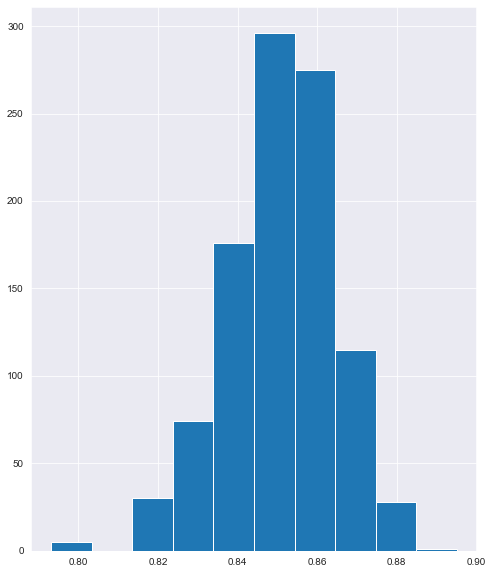

95.0 confidence interval 82.2% and 87.5%


In [88]:
# plot scores
pyplot.hist(stats)
pyplot.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

For RandomforestRegressor model accuracy for 95% confidence level falls between 82% and 87%,which is what we can show case to real world implemantation

# 2)For GradientBoostingRegressor(USING BOOTSTRAP SAMPLE METHOD )

In [89]:
# configure bootstrap
n_iterations = 1000              # Number of bootstrap samples to create
n_size = int(len(concr_scaled) * 0.50)    # picking only 50 % of the given data in every bootstrap sample

# run bootstrap
stats = list()
for i in range(n_iterations):
    # prepare train and test sets
    train = resample(values, n_samples=n_size)  # Sampling with replacement 
    test = np.array([x for x in values if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample
    # fit model
    model = GradientBoostingRegressor(random_state=1, max_depth=20, 
                                min_samples_split=50, n_estimators=230, 
                                learning_rate=0.2)
    
    model.fit(train[:,:-1], train[:,-1])
    
    # evaluate model
    predictions = model.predict(test[:,:-1])
    score = r2_score(test[:,-1], predictions)    # caution, overall accuracy score can mislead when classes are imbalanced
    print(score)
    stats.append(score)

0.8798696534369516
0.8750144914883181
0.8951056670675129
0.8866837631362074
0.8798922543903398
0.8895861949609741
0.9060997846872771
0.8810850477278519
0.8803087638266948
0.8637987210645235
0.894201665946659
0.8796098804292939
0.8673609657710076
0.8797362729537981
0.8440826996100428
0.8917263094288443
0.8954222633677903
0.8792376216354144
0.8822806545842052
0.8905127770414543
0.8687348754045667
0.8665231119366436
0.885795529806548
0.8864982913246826
0.9102073948936475
0.8761190082615138
0.8772240469400544
0.8824105823006375
0.8931333329124432
0.8881595607095589
0.895540863663816
0.8904384832272976
0.8829396739474267
0.8818701785086104
0.896024109073101
0.8776020965932488
0.8857318055427835
0.9011908115184235
0.8708360968247493
0.8937360124202837
0.8740203252915361
0.888549512276325
0.8836205286745552
0.8805383272498681
0.8772401533419195
0.8879415695969157
0.8818302519036277
0.9027536801969682
0.8738780477825412
0.876772553751862
0.8850643865999045
0.8829107639130532
0.8956058269897539

0.8736927989738953
0.8881523339464725
0.8818381740409188
0.8613527605024679
0.9034205772429198
0.8709022576256298
0.896102906514237
0.8603518153970149
0.8776838979839842
0.9002649020226074
0.8764293676765222
0.8843350834788989
0.8970446983920748
0.8864263022861908
0.8673418147110834
0.9052307741136667
0.8840907148711776
0.8807034647753132
0.8913185257943234
0.8774964320002356
0.9067116122814278
0.8725360854285383
0.8871477425202652
0.8891223444212352
0.8748488391024001
0.8834085525161013
0.867935833085969
0.8993753763122772
0.8808201888493877
0.8903624994668944
0.8899473255478004
0.8837376390164208
0.8915661279137723
0.8961460006561278
0.8781330217234339
0.8937944967828643
0.8976468818635597
0.8451479006479323
0.8758281043854906
0.8799139756095289
0.8869283882459817
0.8886646892659266
0.8695864161729565
0.8956919121530027
0.870273441008949
0.8393382029119021
0.8894641602150781
0.8950949029572575
0.8642678351587137
0.8507735748638955
0.8850867136256768
0.8927901477395921
0.8822217742117

0.890179738152962
0.8917630682895326
0.8949645436913147
0.882649477721196
0.869607229030744
0.8624677339562595
0.884920073595395
0.8637521668859323
0.8780396914423252
0.8758055010255301
0.8994146878406043
0.8943067861282573
0.8716871207637062
0.8997148692486192
0.9038994703590058
0.8768001711673485
0.8695636179153544
0.8929901782494484
0.8865245890282026
0.8779738704941791
0.8867156782220702
0.8906999004782487
0.8882201616480752
0.9037888398826588
0.8865687190569235
0.8980574643440362
0.9026335122068423
0.8699516491594654
0.8936634044456926
0.8823772860600588
0.9069482146605817
0.8994904554537198
0.909420232233121
0.8638304613322684
0.9042990646274411
0.869723039540459
0.8957630583792556
0.8843362922428366
0.8998726510121164
0.8744615601224152
0.8760007682327956
0.9050902741512693
0.9040905941922499
0.8901732366568083
0.8577076965100704
0.8772754016435241
0.8833656027168957
0.8912356899224861
0.8691223479329909
0.8854658280249552
0.8891886366257041
0.898958561736595
0.8876134301375507


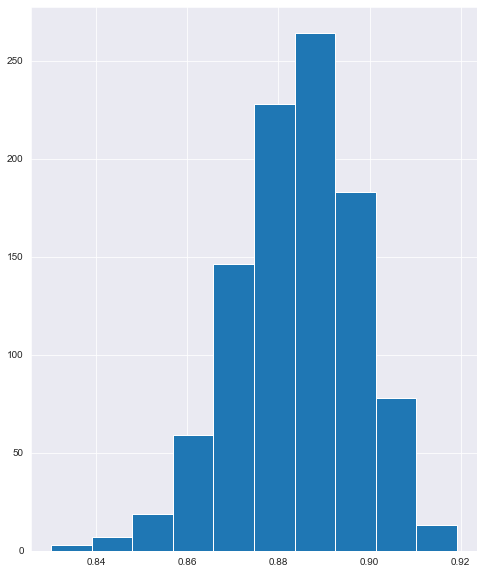

95.0 confidence interval 85.6% and 90.7%


In [90]:
# plot scores
pyplot.hist(stats)
pyplot.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

For GradinetboostRegressor Regressor model accuracy for 95% confidence level falls between 85.4% and 90.7%,which is what we can show case to real world implemantation

# Conclusion :  
    
    
    As we seen out of many regression models we chosen GradientBoostingRegressor and RandomForestRegressor,Both of them performing well
    on training and testing data set
    
    obsrevations
    1. with out pca by dropping few cloumns which are less reliable we seen models accurcy comes around  88% on test data
    2. with pca  we seen much better performance but there is chance of data leak when we scale data for pca(probably)
    3. But still for given data set  both models gradientboostregressor and randomforest regressor are performing well.
    4.there is no drastic change in perfromance we go for pca dimensionality reduction
    5. 95% confidence levels for both the models are looks good 
    6. GradientBoostingRegressor perfroms well better than RandomForestRegressor.
    7.for this dataset i ahve tried exrtacting features and building model,but it doesnt make sense to explan 1000
    records need for more features(feature engineering),so resorted to pca
    8.i  have used kfold and grid sreach to tune model
    9.with out dropping any cloumns i have explained 95% confidence intervel level for both regression models.
    
    outcome: Only by dropping 2 cloumns "slag" and " ash" ,we can build and deploy model  with out usig pca  but 
    am not against pca, iam just choosing with out pca if there is a choice.
    
   Choice of model in order:
   
   
   
   1)GradientBoostingRegressor
   
   
   
   2)RandomForestRegressor